# LeNet 5 - MNIST
- MNIST is a large database of small, square 28 x 28 pixel grayscale images of handwritten single digits between 0 and 9. 
- It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000. 
- All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9).

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.np_utils import to_categorical   

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

np.random.seed(0)

## Loading Dataset :

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#### Plot Function :

In [4]:
def plot_sample(x,y):
    plt.figure(figsize=(10,10))
    for i in range(len(x)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        plt.imshow(x[i])
        
        plt.imshow(x[i])
        
        try :
            plt.xlabel(y[i])
        except :
            plt.xlabel(classes[y[i][0]])
            
    plt.show()

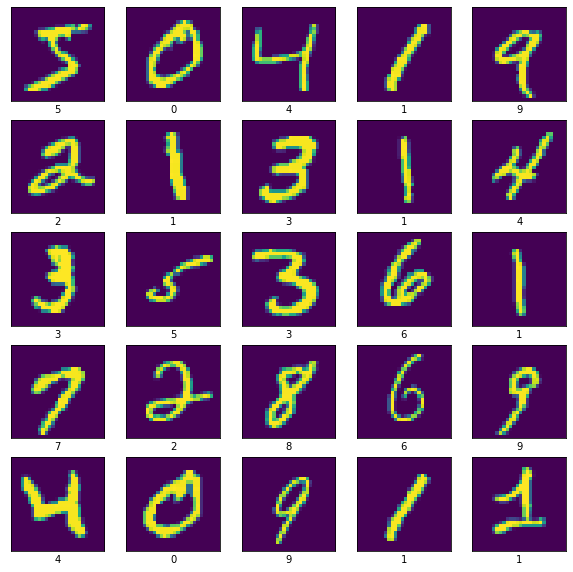

In [5]:
plot_sample(x_train[:25],y_train[:25])

## Preprocessing Dataset :

### 1. Normalizing Data :

In [6]:
x_train=np.array(x_train/255.0, dtype=np.float32)
x_test=np.array(x_test/255.0, dtype=np.float32)

### 2. Reshaping Samples :

In [7]:
x_train=np.reshape(x_train,(-1,28,28,1))
x_test=np.reshape(x_test,(-1,28,28,1))

### 3. One-Hot encoding Labels :

In [8]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [9]:
print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##  Building Model :

### LeNet 5 Architecture :
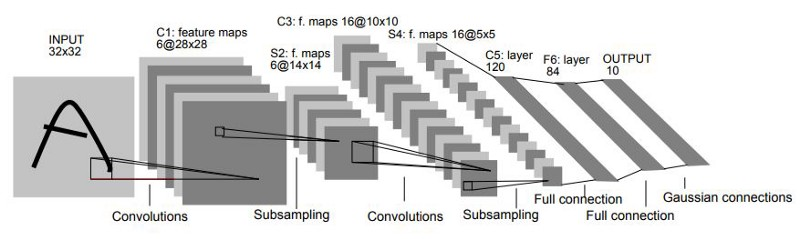

In [11]:
LeNet_5=tf.keras.Sequential()

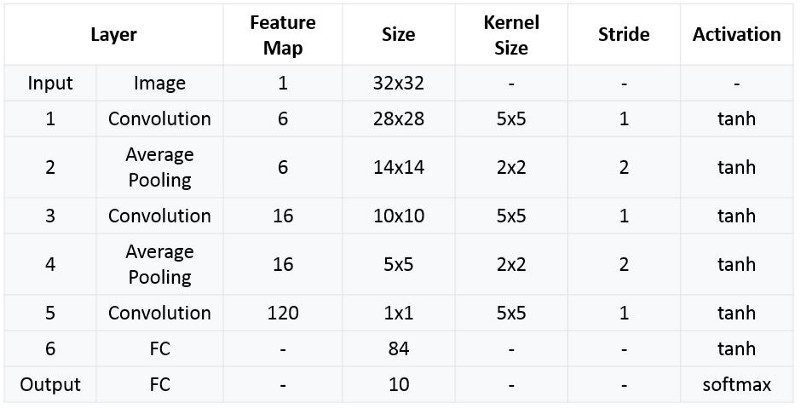

### Adding Layers :
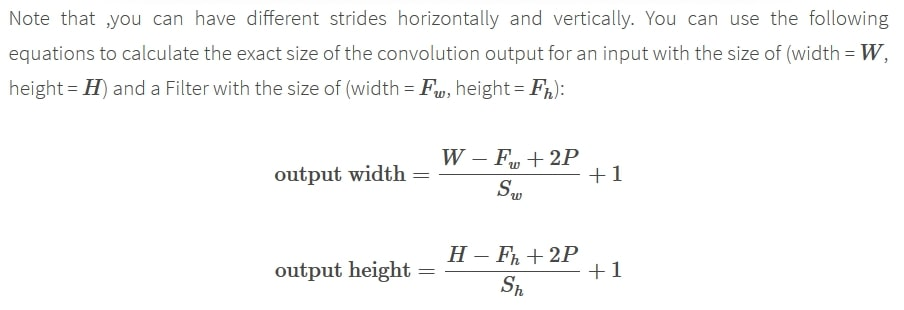

In [12]:
LeNet_5.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), padding='same', strides=(1,1), activation='tanh',input_shape=(28,28,1)))
LeNet_5.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
LeNet_5.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', strides=(1,1), activation='tanh'))
LeNet_5.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))
LeNet_5.add(tf.keras.layers.Conv2D(filters=120, kernel_size=(5,5), padding='valid', strides=(1,1), activation='tanh'))
LeNet_5.add(tf.keras.layers.Flatten())
LeNet_5.add(tf.keras.layers.Dense(84, activation='tanh'))
LeNet_5.add(tf.keras.layers.Dense(10, activation='softmax'))

### Compiling  Model :

In [13]:
LeNet_5.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

## Training Model :

In [14]:
history=LeNet_5.fit(x_train,y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 14s 5ms/step - loss: 0.2300 - accuracy: 0.9319 - val_loss: 0.1020 - val_accuracy: 0.9689
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0883 - accuracy: 0.9734 - val_loss: 0.0815 - val_accuracy: 0.9733
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0516 - val_accuracy: 0.9833
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0474 - val_accuracy: 0.9840
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.0473 - val_accuracy: 0.9861
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0456 - val_accuracy: 0.9862
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0441 - val_acc

## Model Summary :

In [15]:
LeNet_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

## Model Performance :

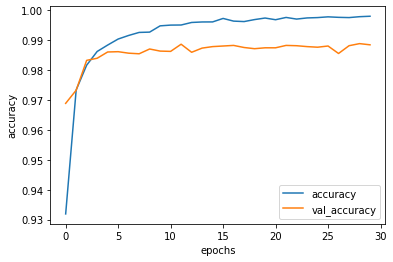

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()